In [59]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("data")) 

['test.csv', 'ex2data2.txt', 'ex2data1.txt', 'train.csv']


In [60]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [61]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [62]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [63]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non

In [64]:
passengerId = test['PassengerId']
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)


In [65]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round(train.isnull().sum().sort_values(ascending=False)/len(train)*100, 2)
pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])


Total  Percent
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
Fare             0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
PassengerId      0     0.00

In [66]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
Embarked         0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00

In [67]:
percent = pd.DataFrame(round(train['Embarked'].value_counts(dropna=False, normalize=True)*100, 2))
total = pd.DataFrame(train['Embarked'].value_counts(dropna=False))

total.columns = ['Total']
total.columns = ['Percent']
pd.concat([total, percent], axis=1)

Percent  Embarked
S        644     72.28
C        168     18.86
Q         77      8.64
NaN        2      0.22

In [68]:
train[train.Embarked.isnull()]


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

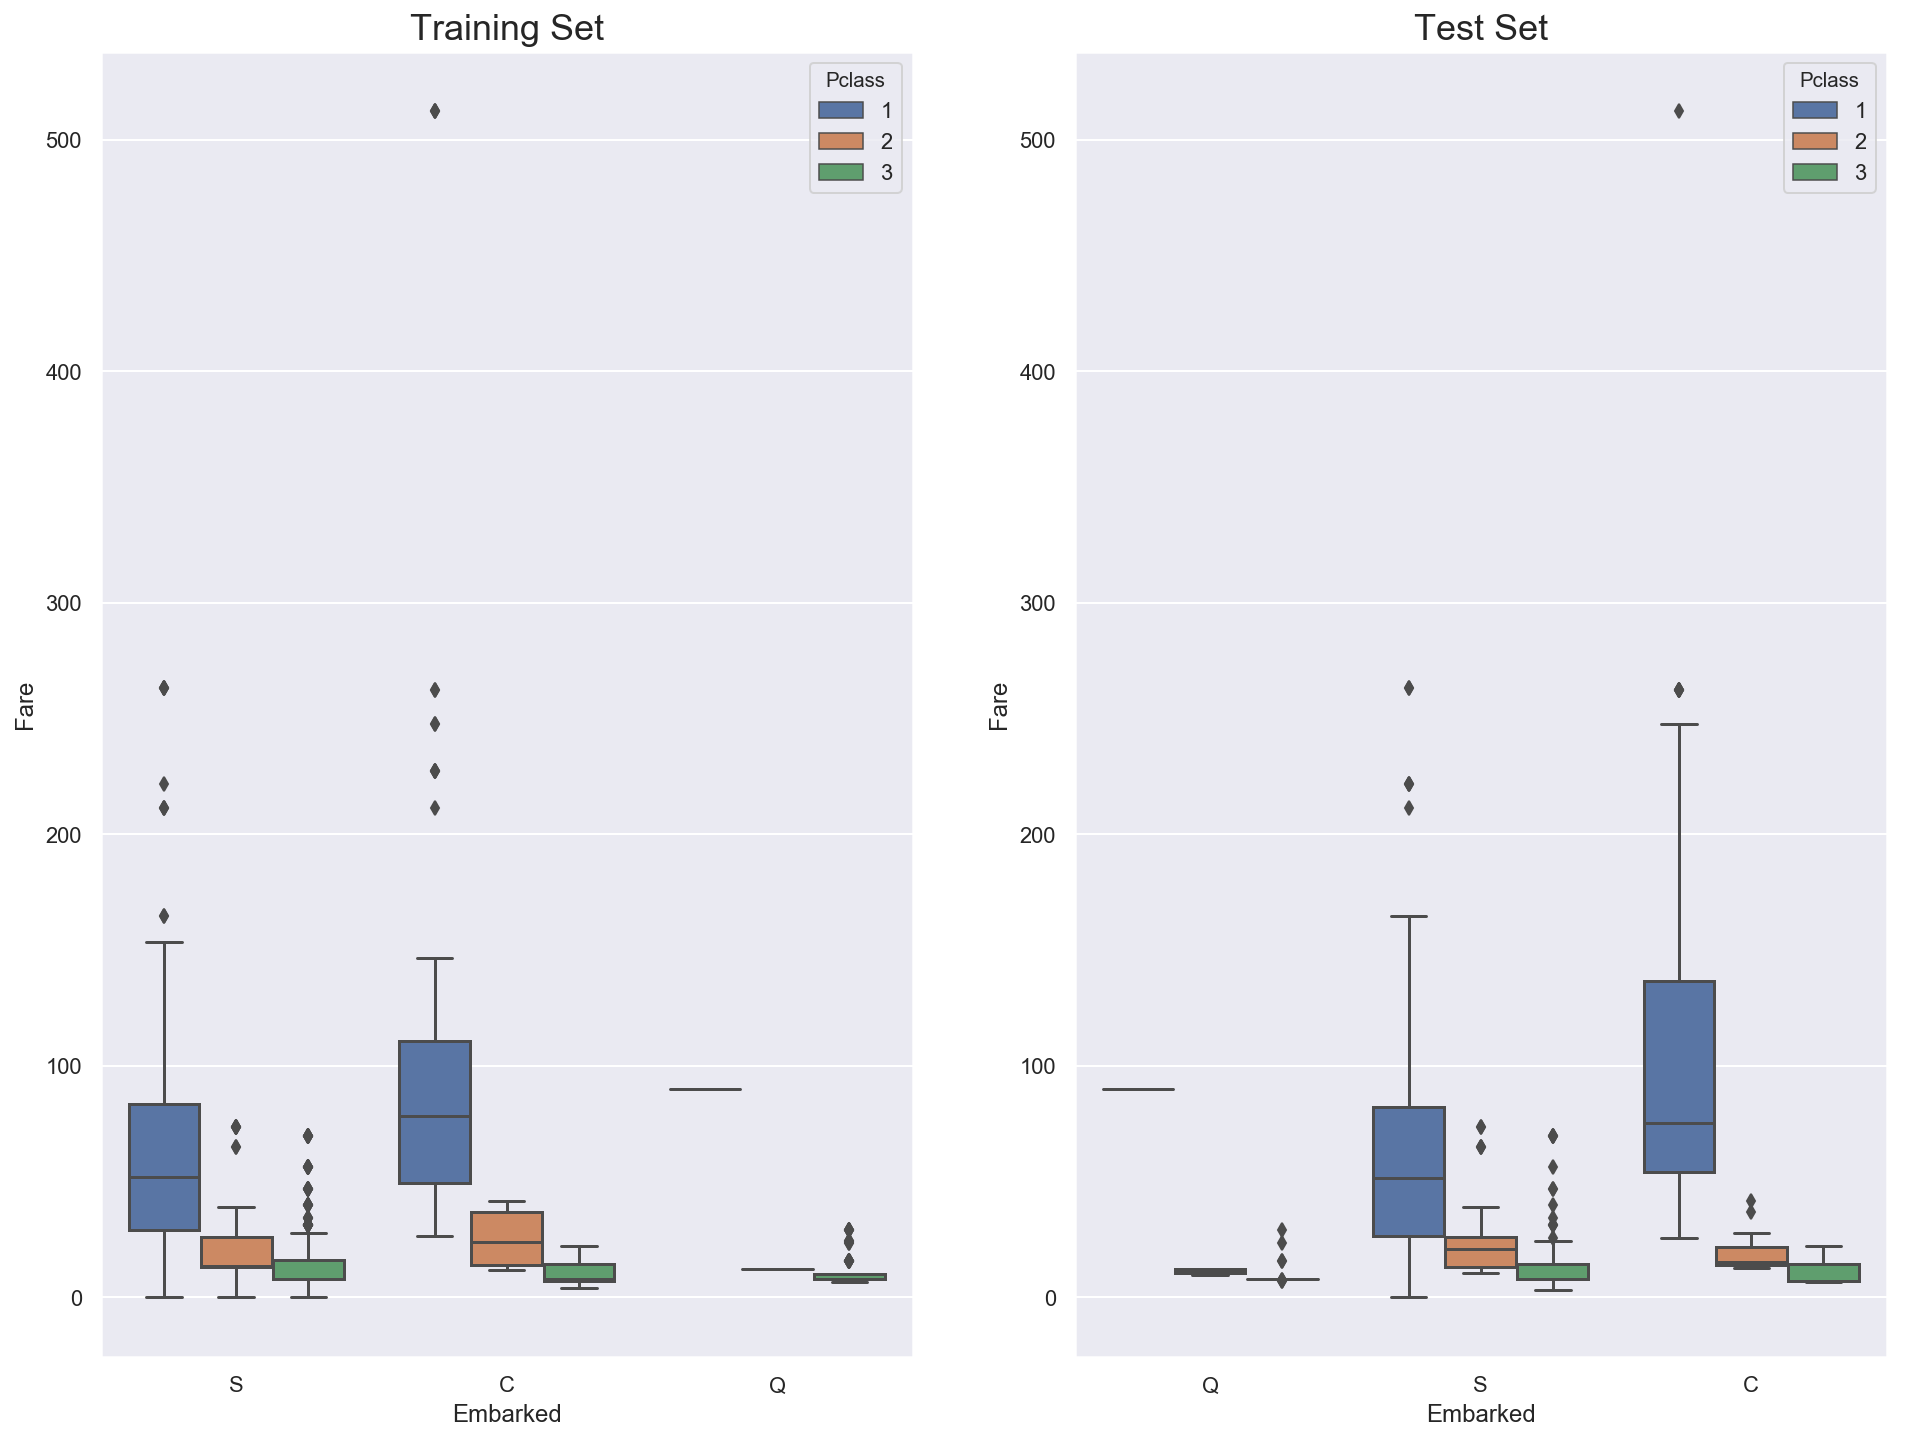

In [69]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()


In [70]:
train.Embarked.fillna('C', inplace=True)

In [71]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [72]:
survivers = train['Survived']

train.drop(['Survived'], axis=1, inplace=True)

all_data = pd.concat([train, test], ignore_index=False)

all_data.Cabin.fillna('N', inplace=True)

In [73]:
all_data['Cabin'] = [i[0] for i in all_data['Cabin']]

In [74]:
with_N = all_data[all_data['Cabin'] == 'N']
wihout_N = all_data[all_data['Cabin'] != 'N']

all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [75]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [76]:
with_N['Cabin'] = with_N['Fare'].apply(lambda x: cabin_estimator(x))

In [77]:
all_data = pd.concat([with_N, wihout_N], axis=0)

all_data.sort_values(by = 'PassengerId', inplace=True)

train = all_data[:891]
test = all_data[891:]

train['Survived'] = survivers

In [78]:
test[test['Fare'].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN     B        S

In [79]:
missing_value = test[(test['Pclass'] == 3) & (test['Embarked'] == 'S') & (test['Sex'] == 'male')].Fare.mean()
test['Fare'].fillna(missing_value, inplace = True)

In [80]:
print('Train age missing value: ' + str((train['Age'].isnull().sum()/len(train)) * 100)+str('%'))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


Text(0.5,0,'Sex')

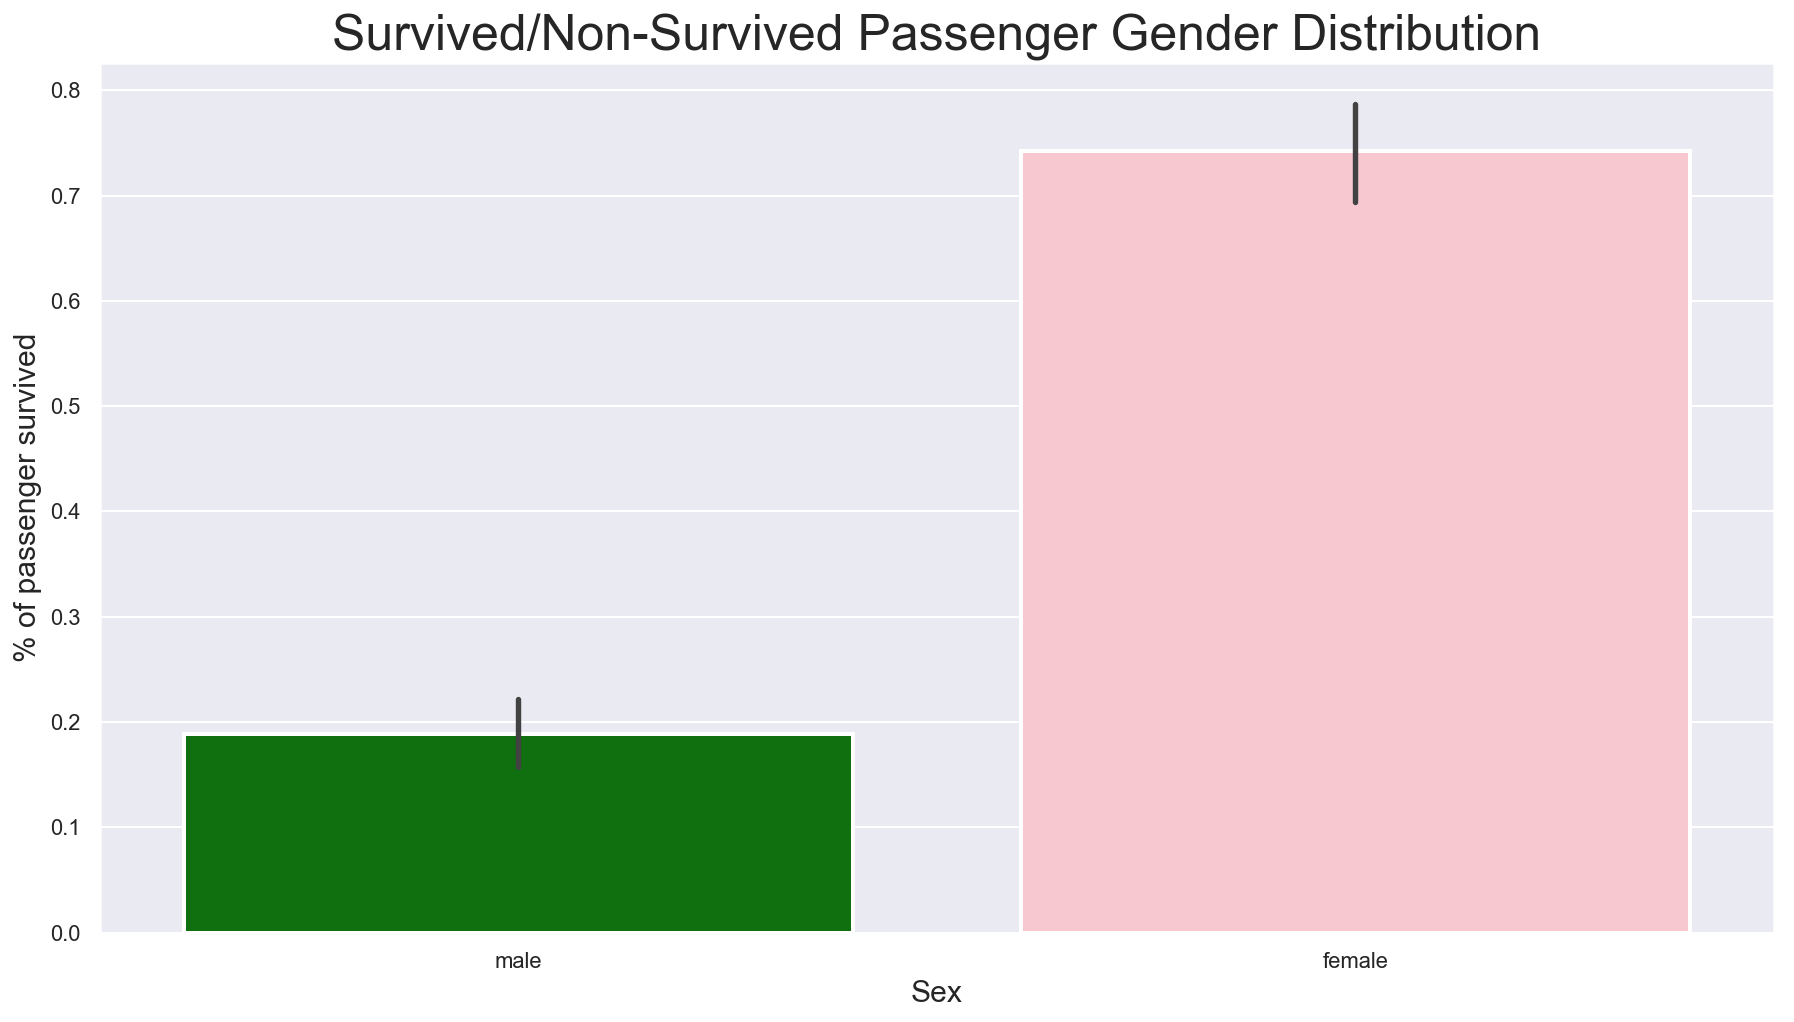

In [81]:
pal = {'male': 'green', 'female': 'Pink'}
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title('Survived/Non-Survived Passenger Gender Distribution', fontsize=25)
plt.ylabel('% of passenger survived', fontsize=15)
plt.xlabel('Sex', fontsize=15)

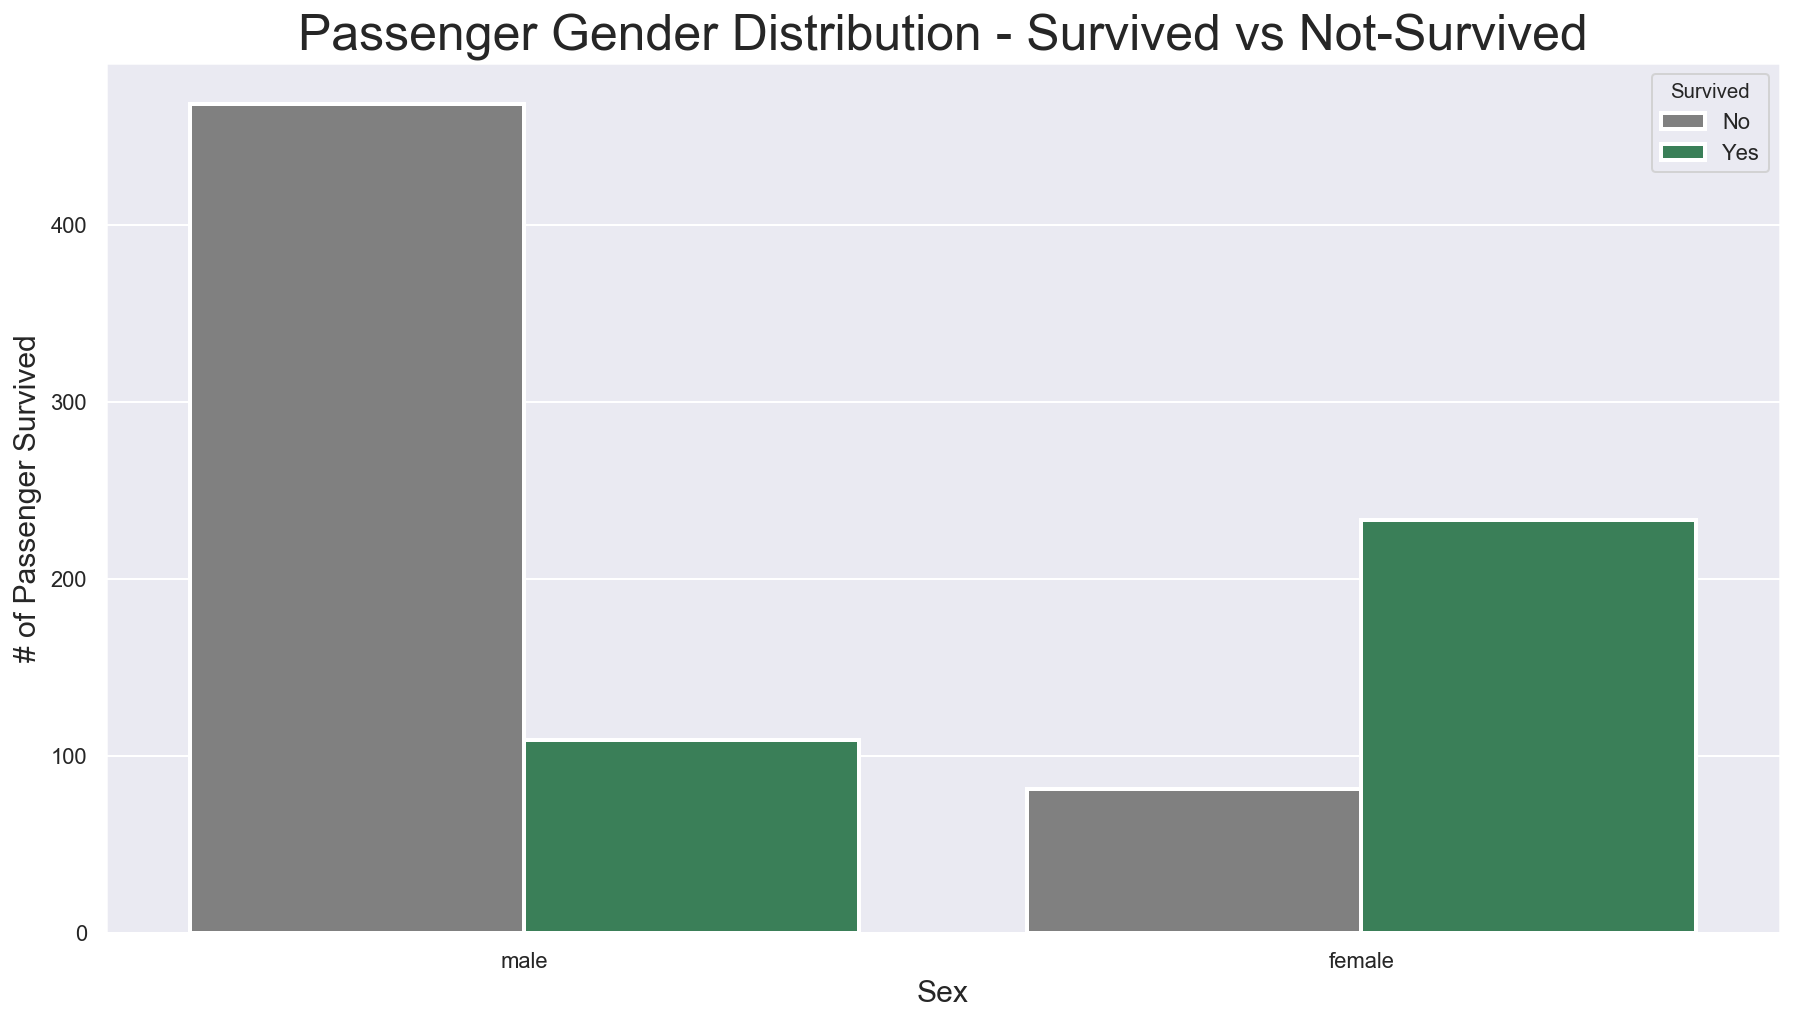

In [82]:
pal = {1: 'seagreen', 0:'grey'}
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax = sns.countplot(x='Sex',
                  hue='Survived',
                  data=train,
                  linewidth=2,
                  palette=pal)
plt.title('Passenger Gender Distribution - Survived vs Not-Survived', fontsize=25)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# of Passenger Survived', fontsize=15)

leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')
plt.show()

([<matplotlib.axis.XTick at 0x11c571470>,
 <a list of 3 Text xticklabel objects>)

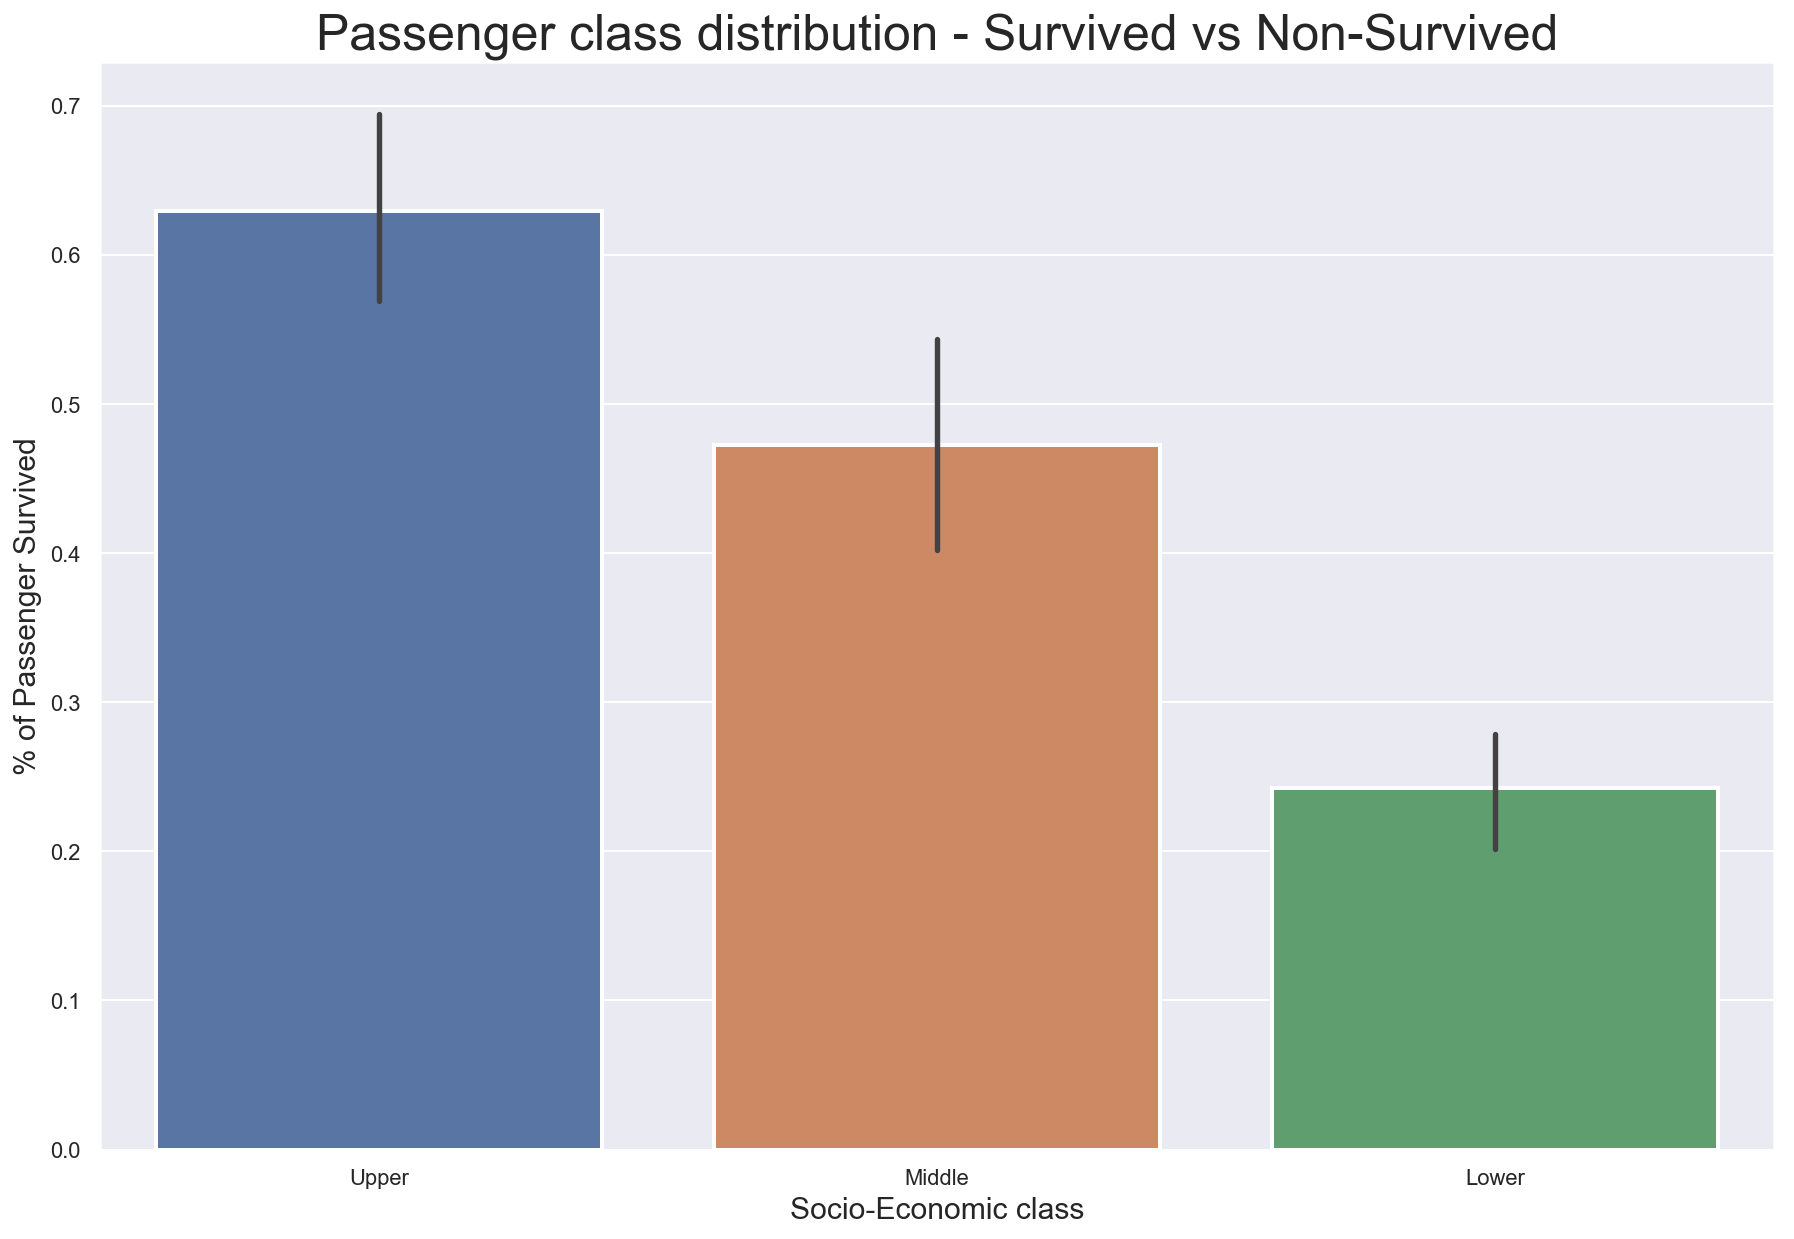

In [83]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Pclass',
           y='Survived',
           data=train,
           linewidth=2)
plt.title('Passenger class distribution - Survived vs Non-Survived', fontsize=25)
plt.xlabel('Socio-Economic class', fontsize=15)
plt.ylabel('% of Passenger Survived', fontsize=15)
labels = ['Upper', 'Middle', 'Lower']
val = [0,1,2]
plt.xticks(val, labels)

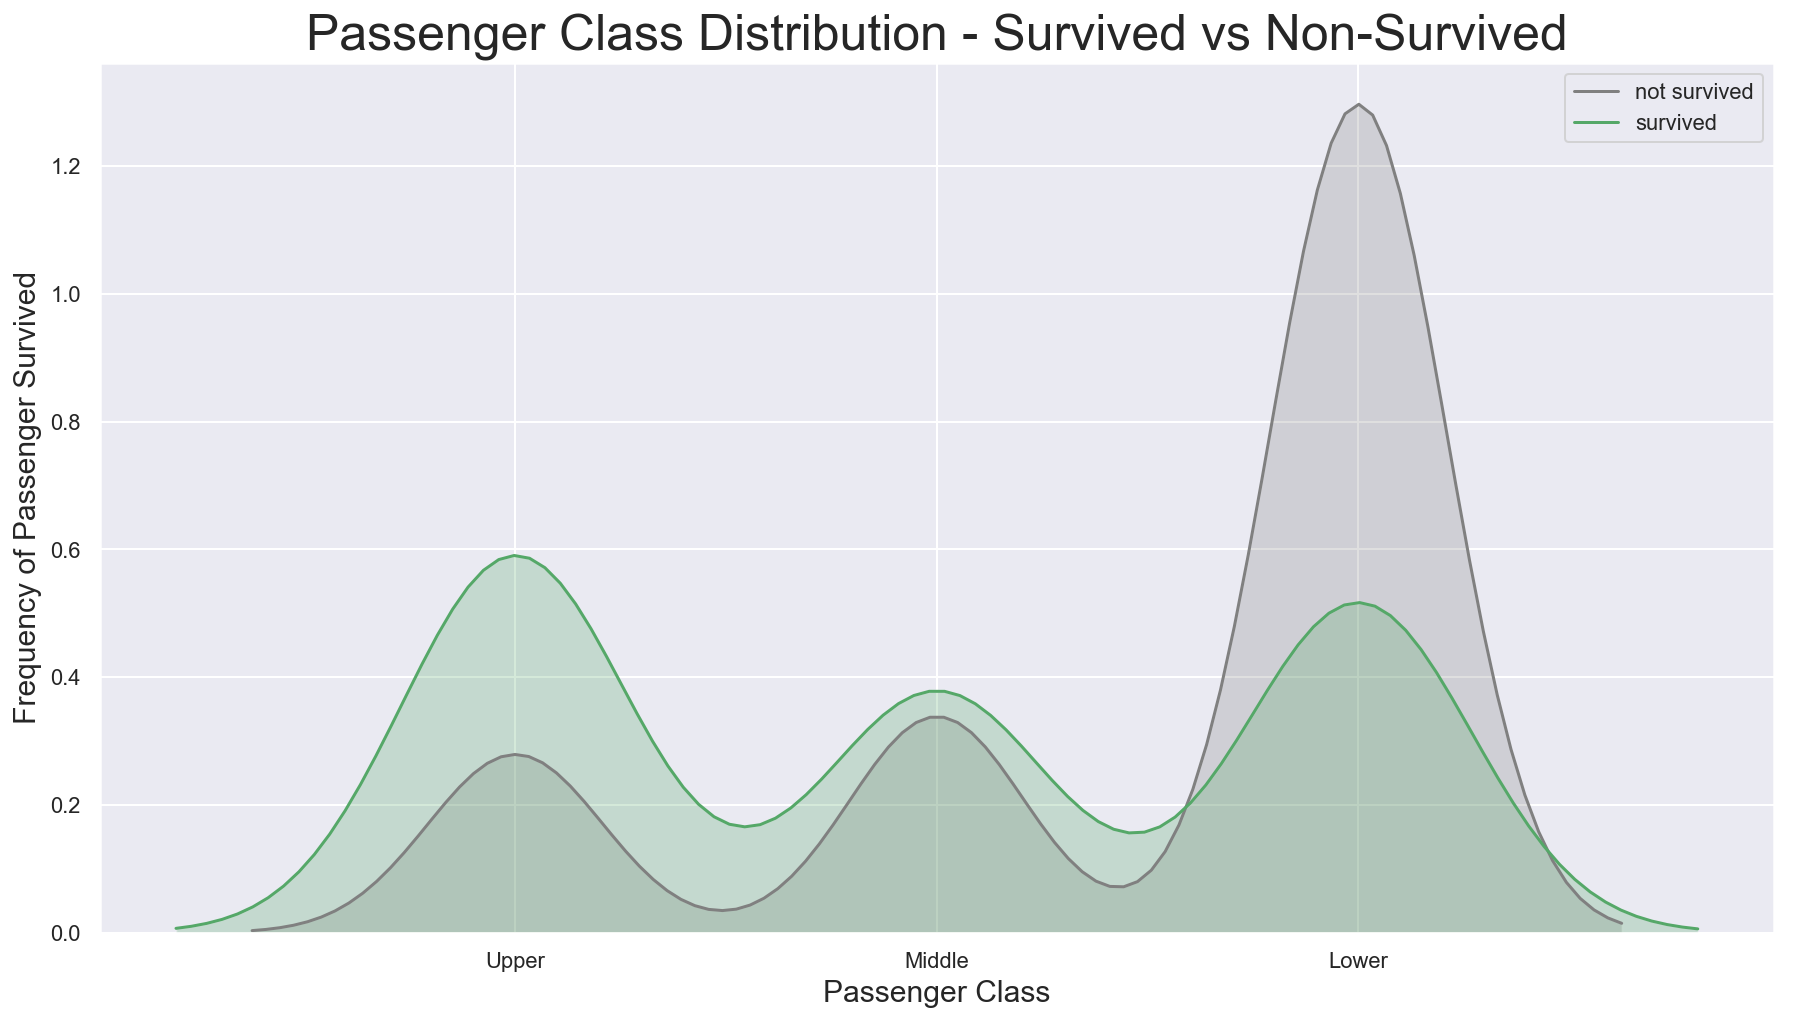

In [84]:
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

Text(0.5,0,'Fare')

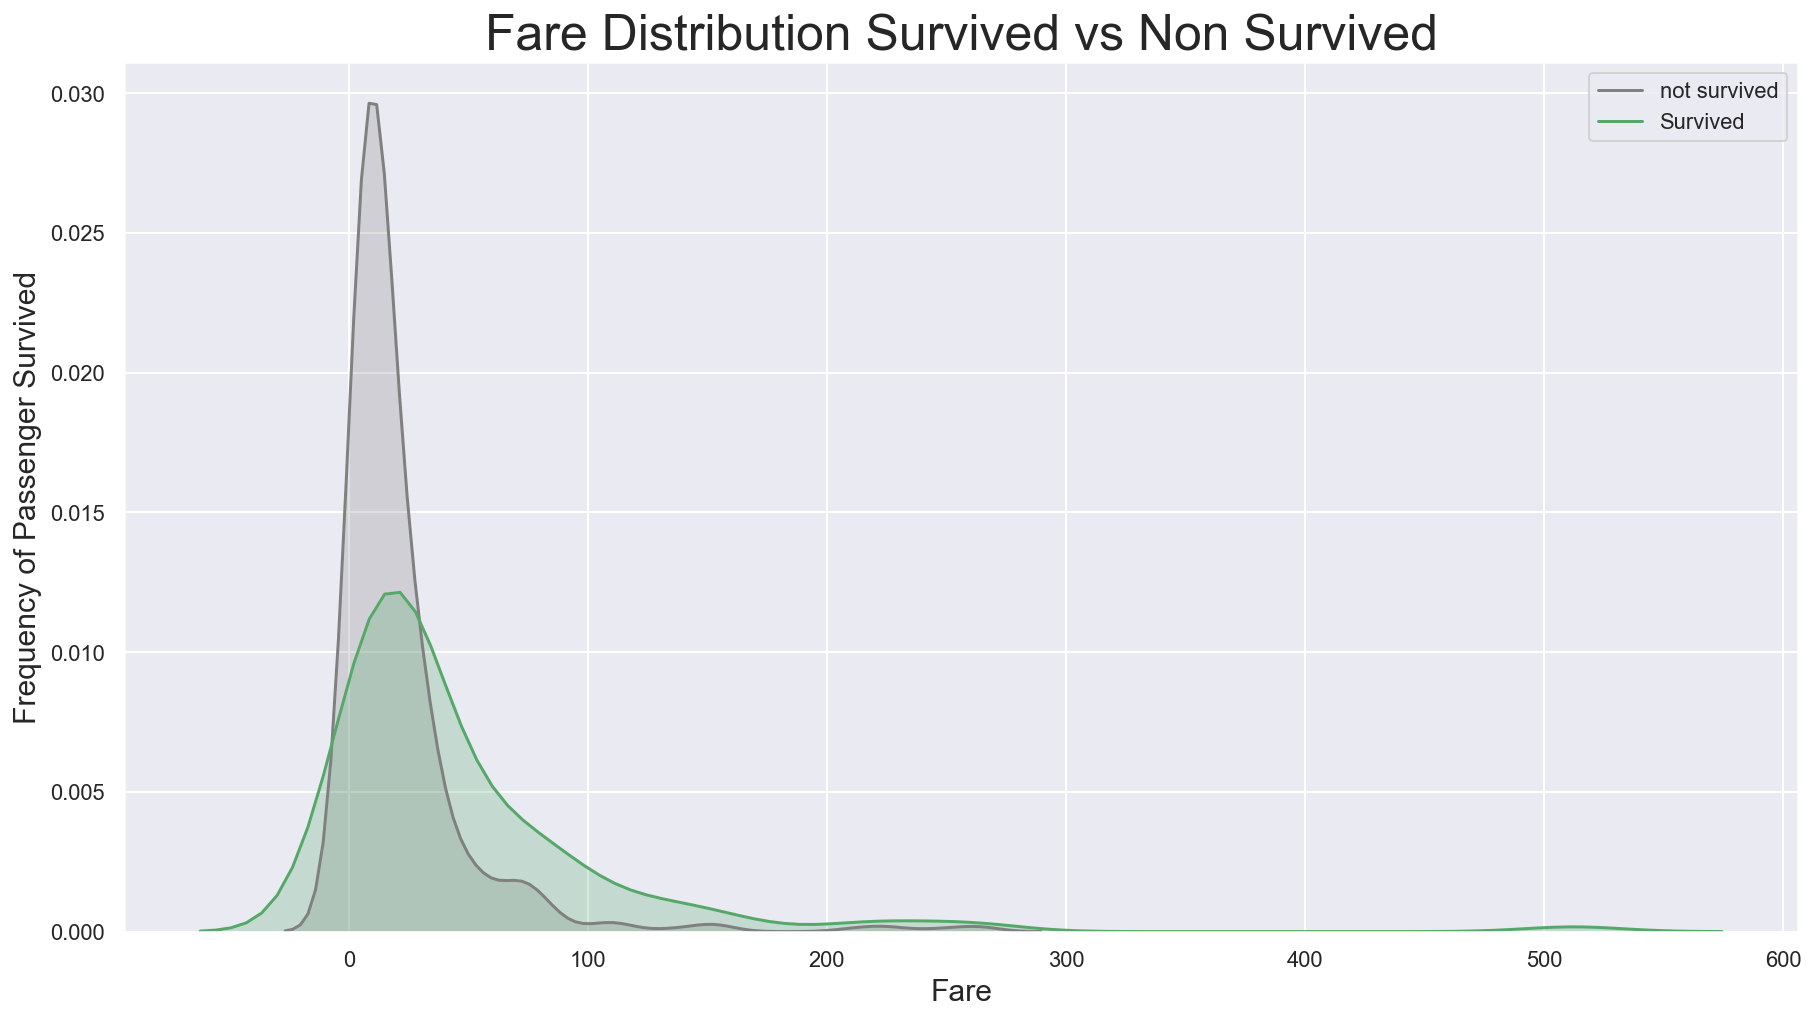

In [85]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'], color='gray', shade=True, label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'], color='g', shade=True, label='Survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize=25)
plt.ylabel('Frequency of Passenger Survived', fontsize=15)
plt.xlabel('Fare', fontsize=15)

In [86]:
train[train['Fare'] > 280]

PassengerId  Pclass                                Name     Sex   Age  \
258          259       1                    Ward, Miss. Anna  female  35.0   
679          680       1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737          738       1              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked  Survived  
258      0      0  PC 17755  512.3292     B        C         1  
679      0      1  PC 17755  512.3292     B        C         1  
737      0      0  PC 17755  512.3292     B        C         1

ValueError: array must not contain infs or NaNs

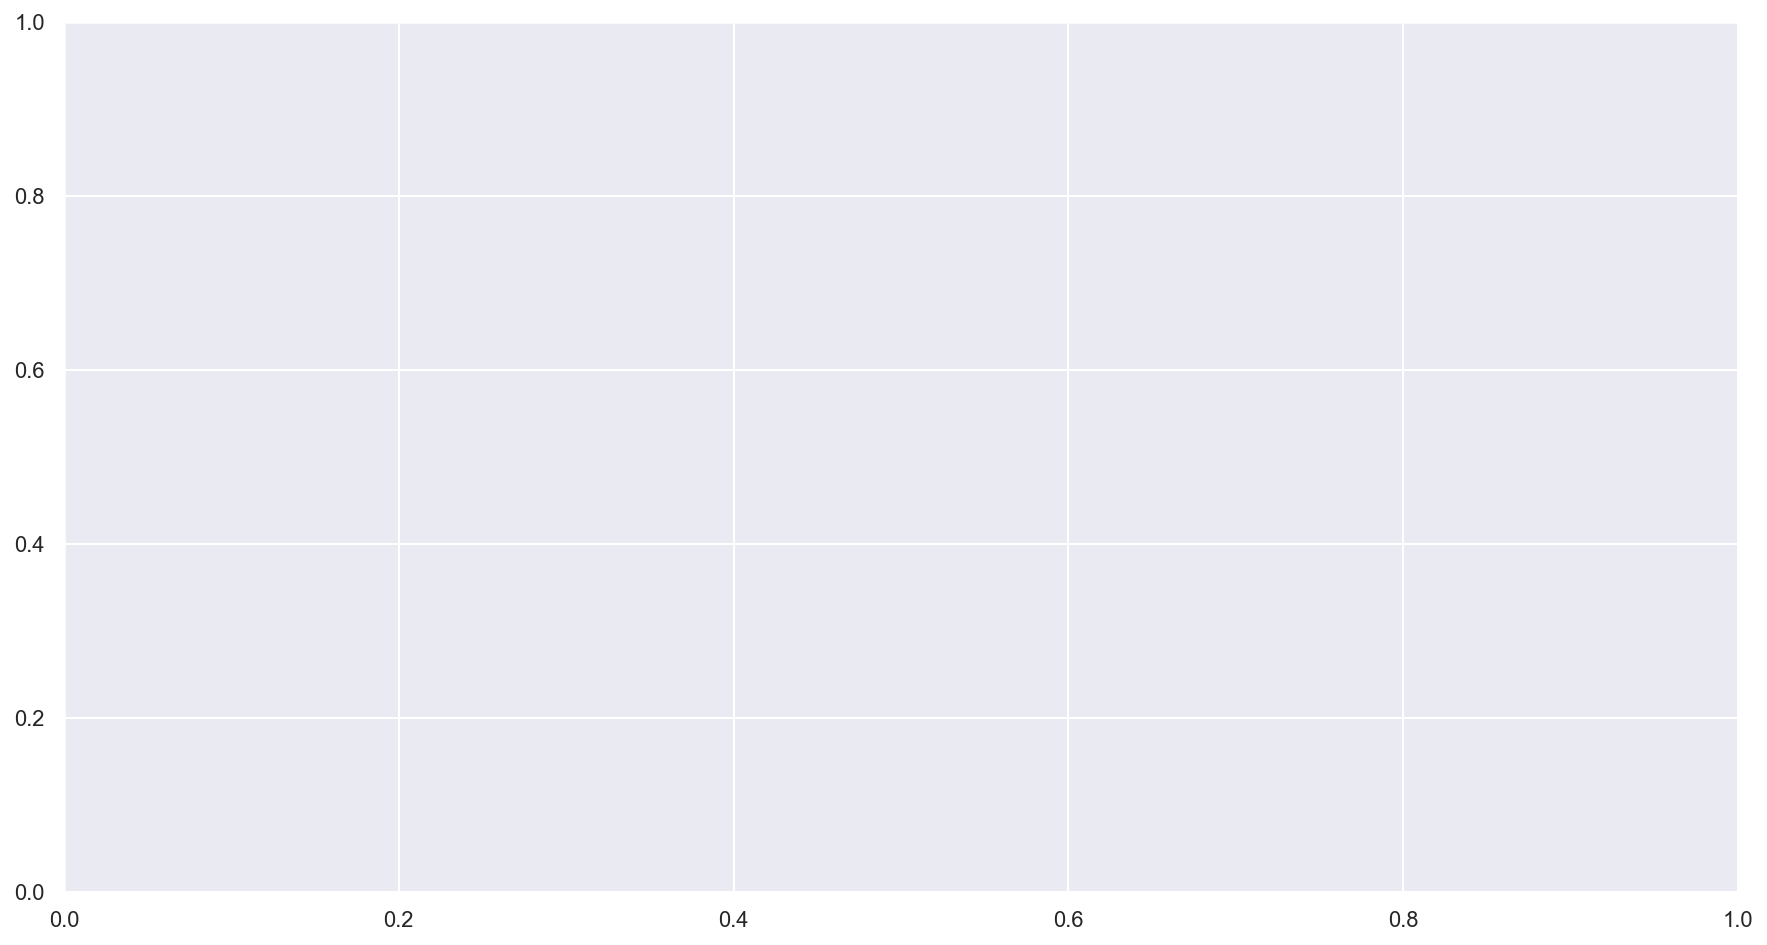

In [87]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

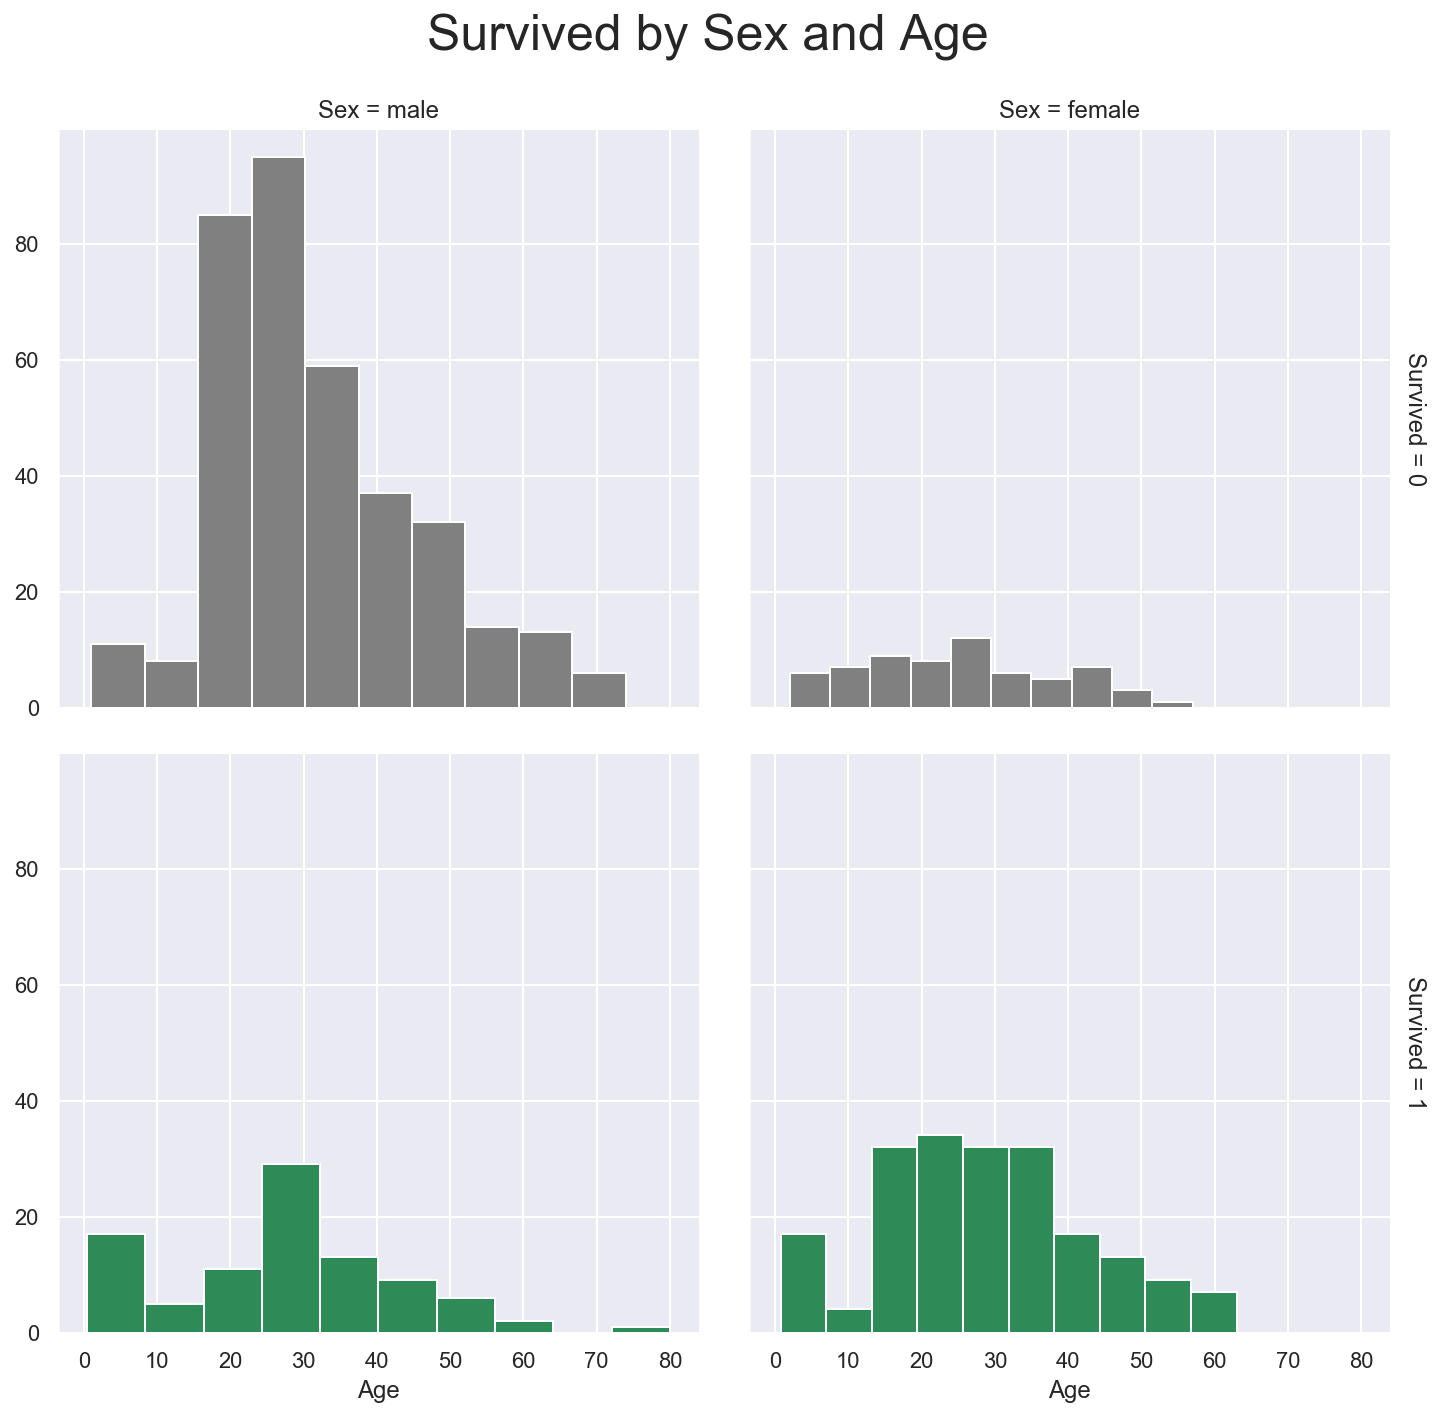

In [88]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

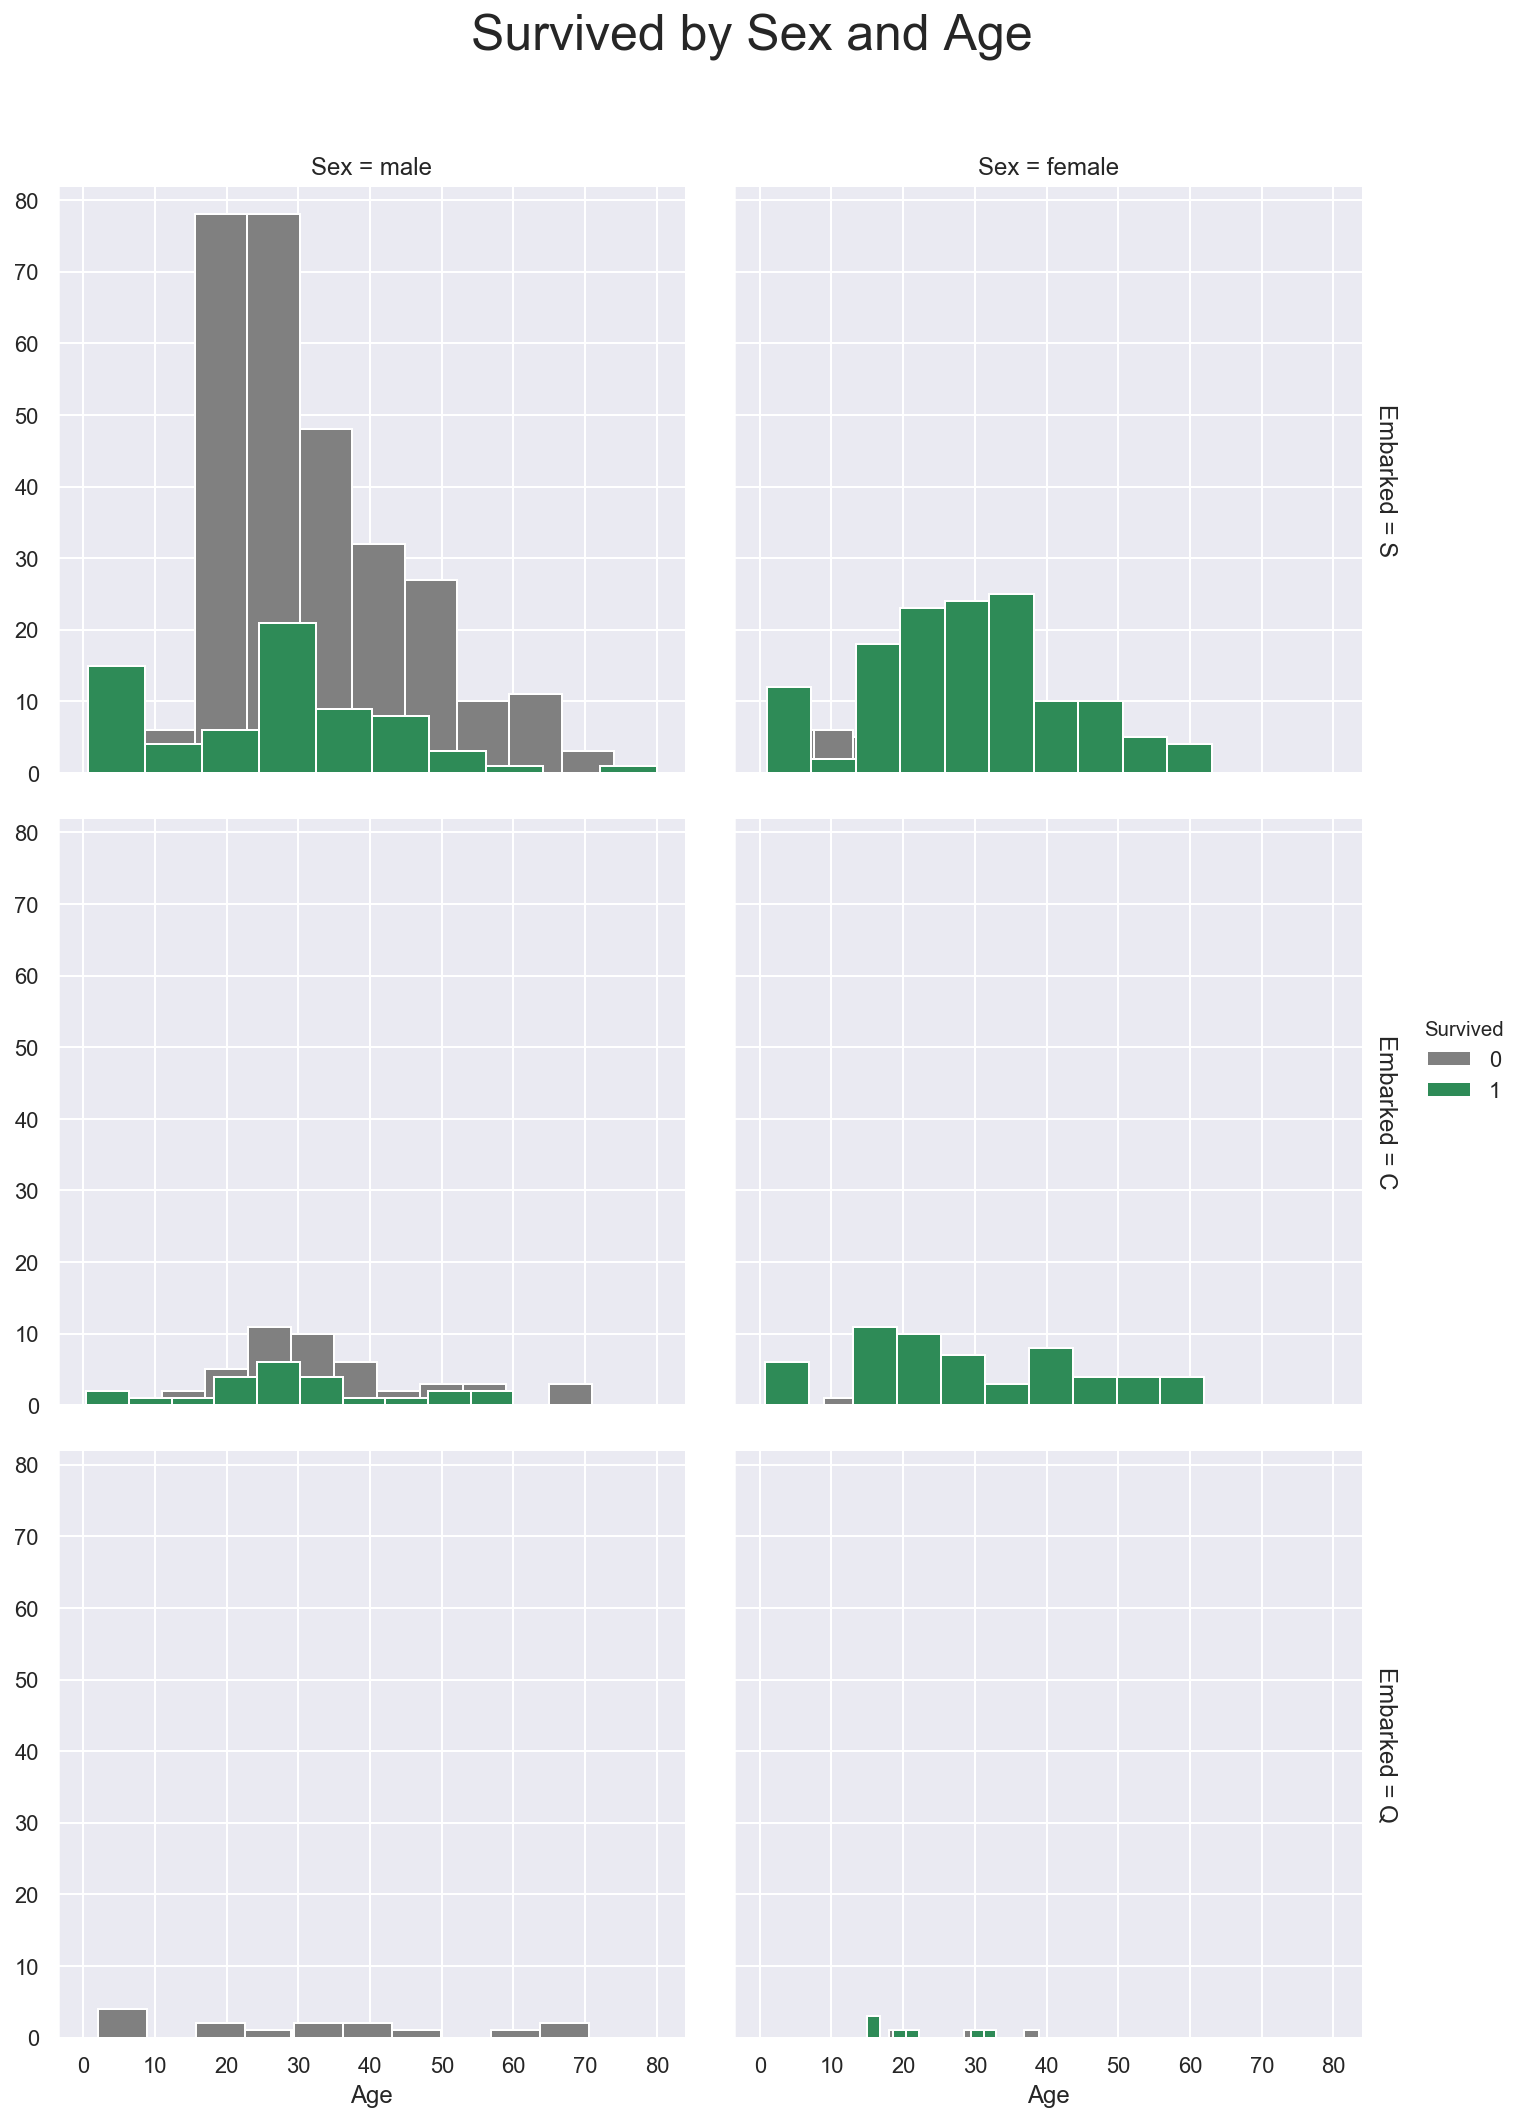

In [89]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

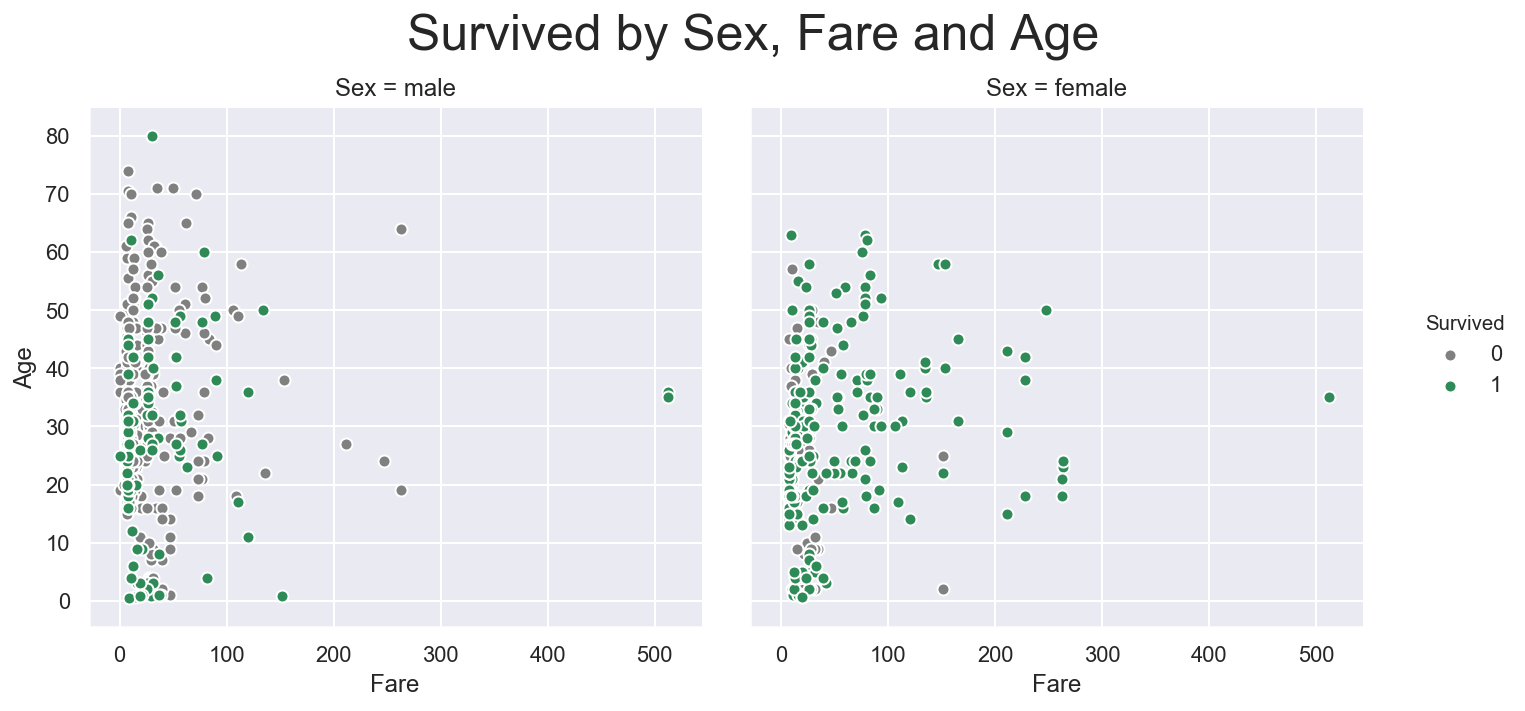

In [90]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

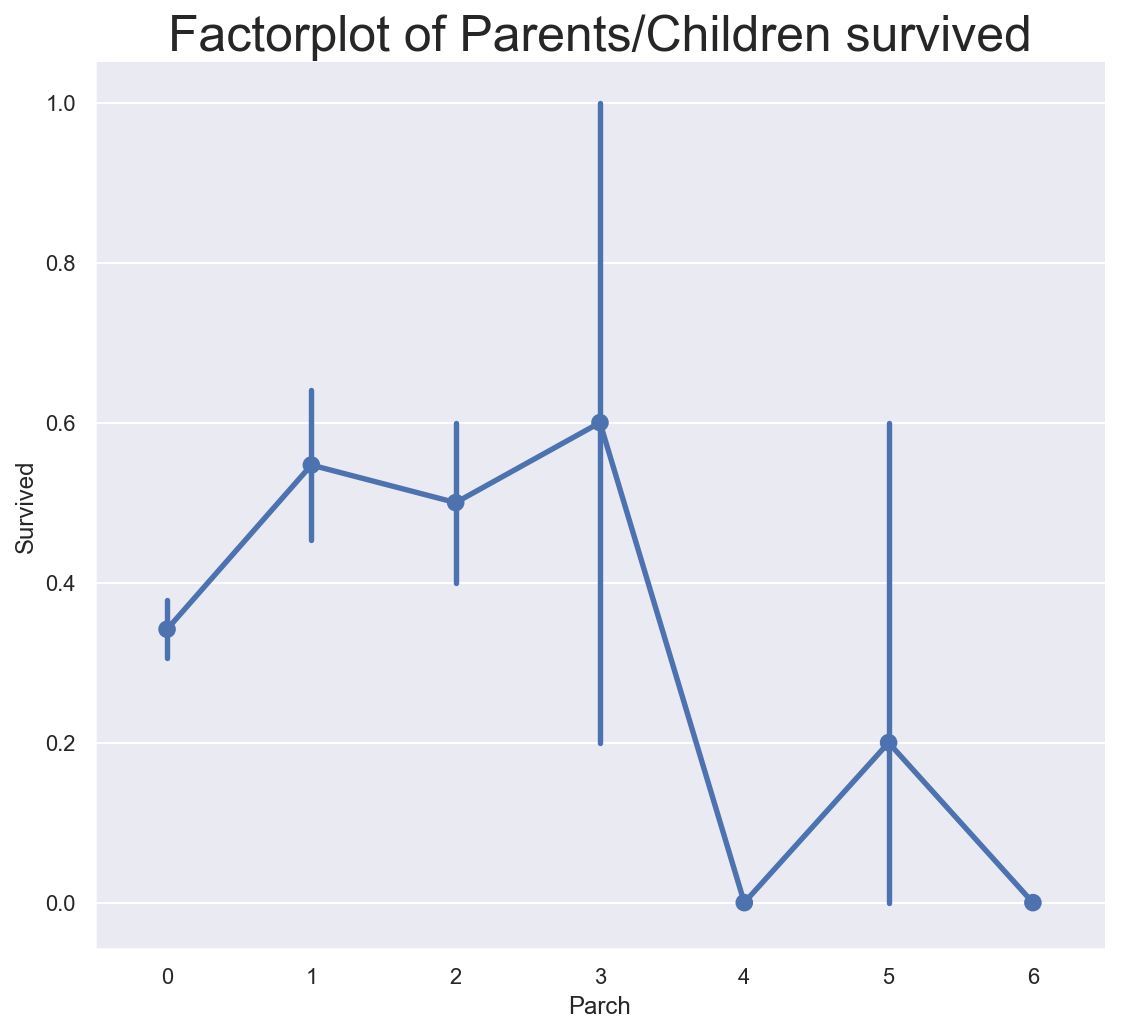

In [91]:
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

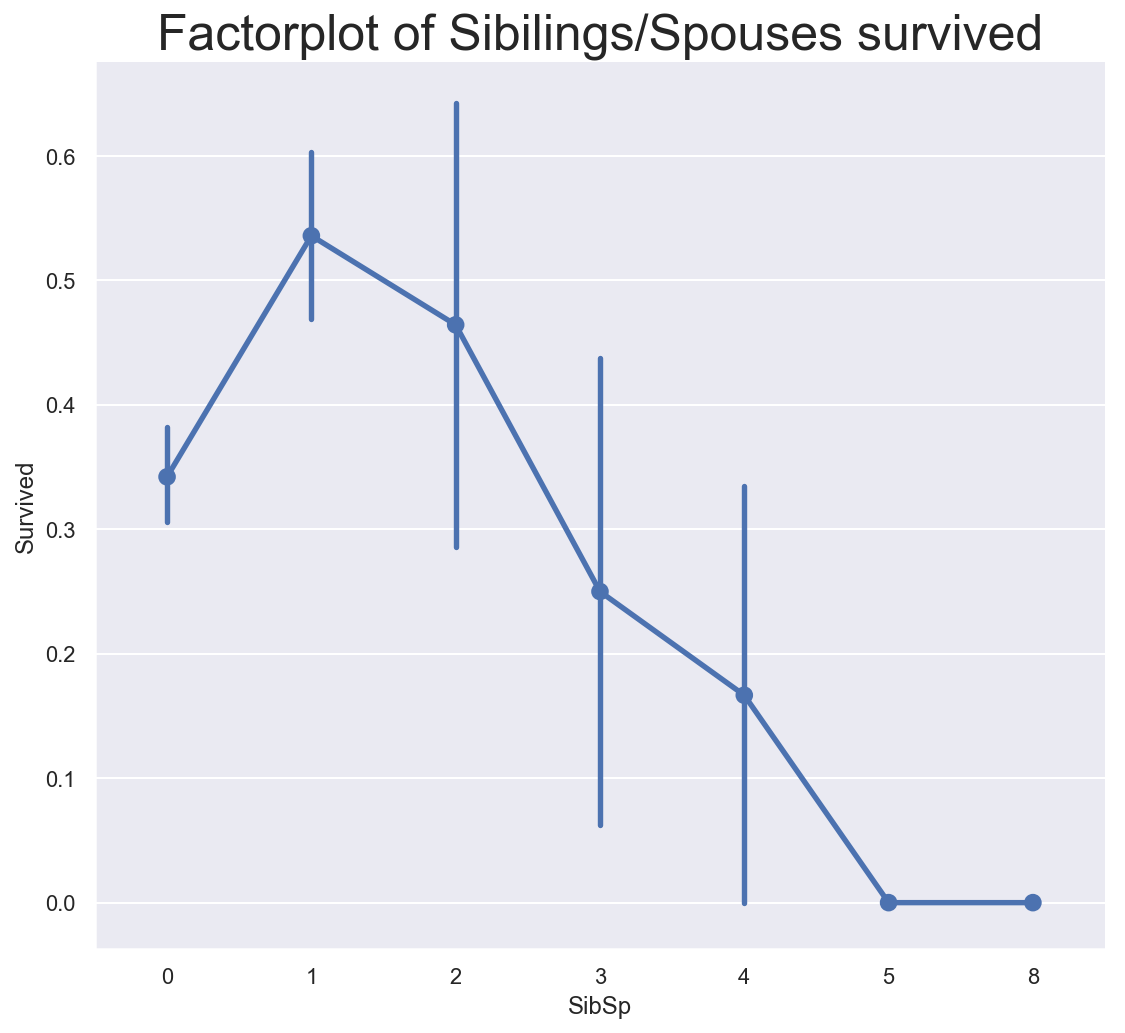

In [92]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

In [93]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x=='female' else 1)
test['Sex'] = train['Sex'].apply(lambda x:0 if x=='female' else 1)

In [94]:
train.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   888.000000  888.000000  888.000000  711.000000  888.000000   
mean    445.618243    2.313063    0.647523   29.675345    0.524775   
std     257.405474    0.834007    0.478011   14.552495    1.104186   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     222.750000    2.000000    0.000000   20.000000    0.000000   
50%     445.500000    3.000000    1.000000   28.000000    0.000000   
75%     667.250000    3.000000    1.000000   38.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Survived  
count  888.000000  888.000000  888.000000  
mean     0.381757   30.582164    0.381757  
std      0.806949   41.176366    0.486091  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   30.771850    1.000000  
max      6.000000  263.000000    1.000000

In [95]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))


Survived
Survived     1.000000
Sex          0.545899
Pclass       0.334068
Fare         0.261742
Parch        0.082157
Age          0.079472
SibSp        0.033395
PassengerId  0.006916

In [96]:
corr = train.corr()**2
corr['Survived'].sort_values(ascending=False)


Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

Text(0.5,1.03,'Correlations Among Features')

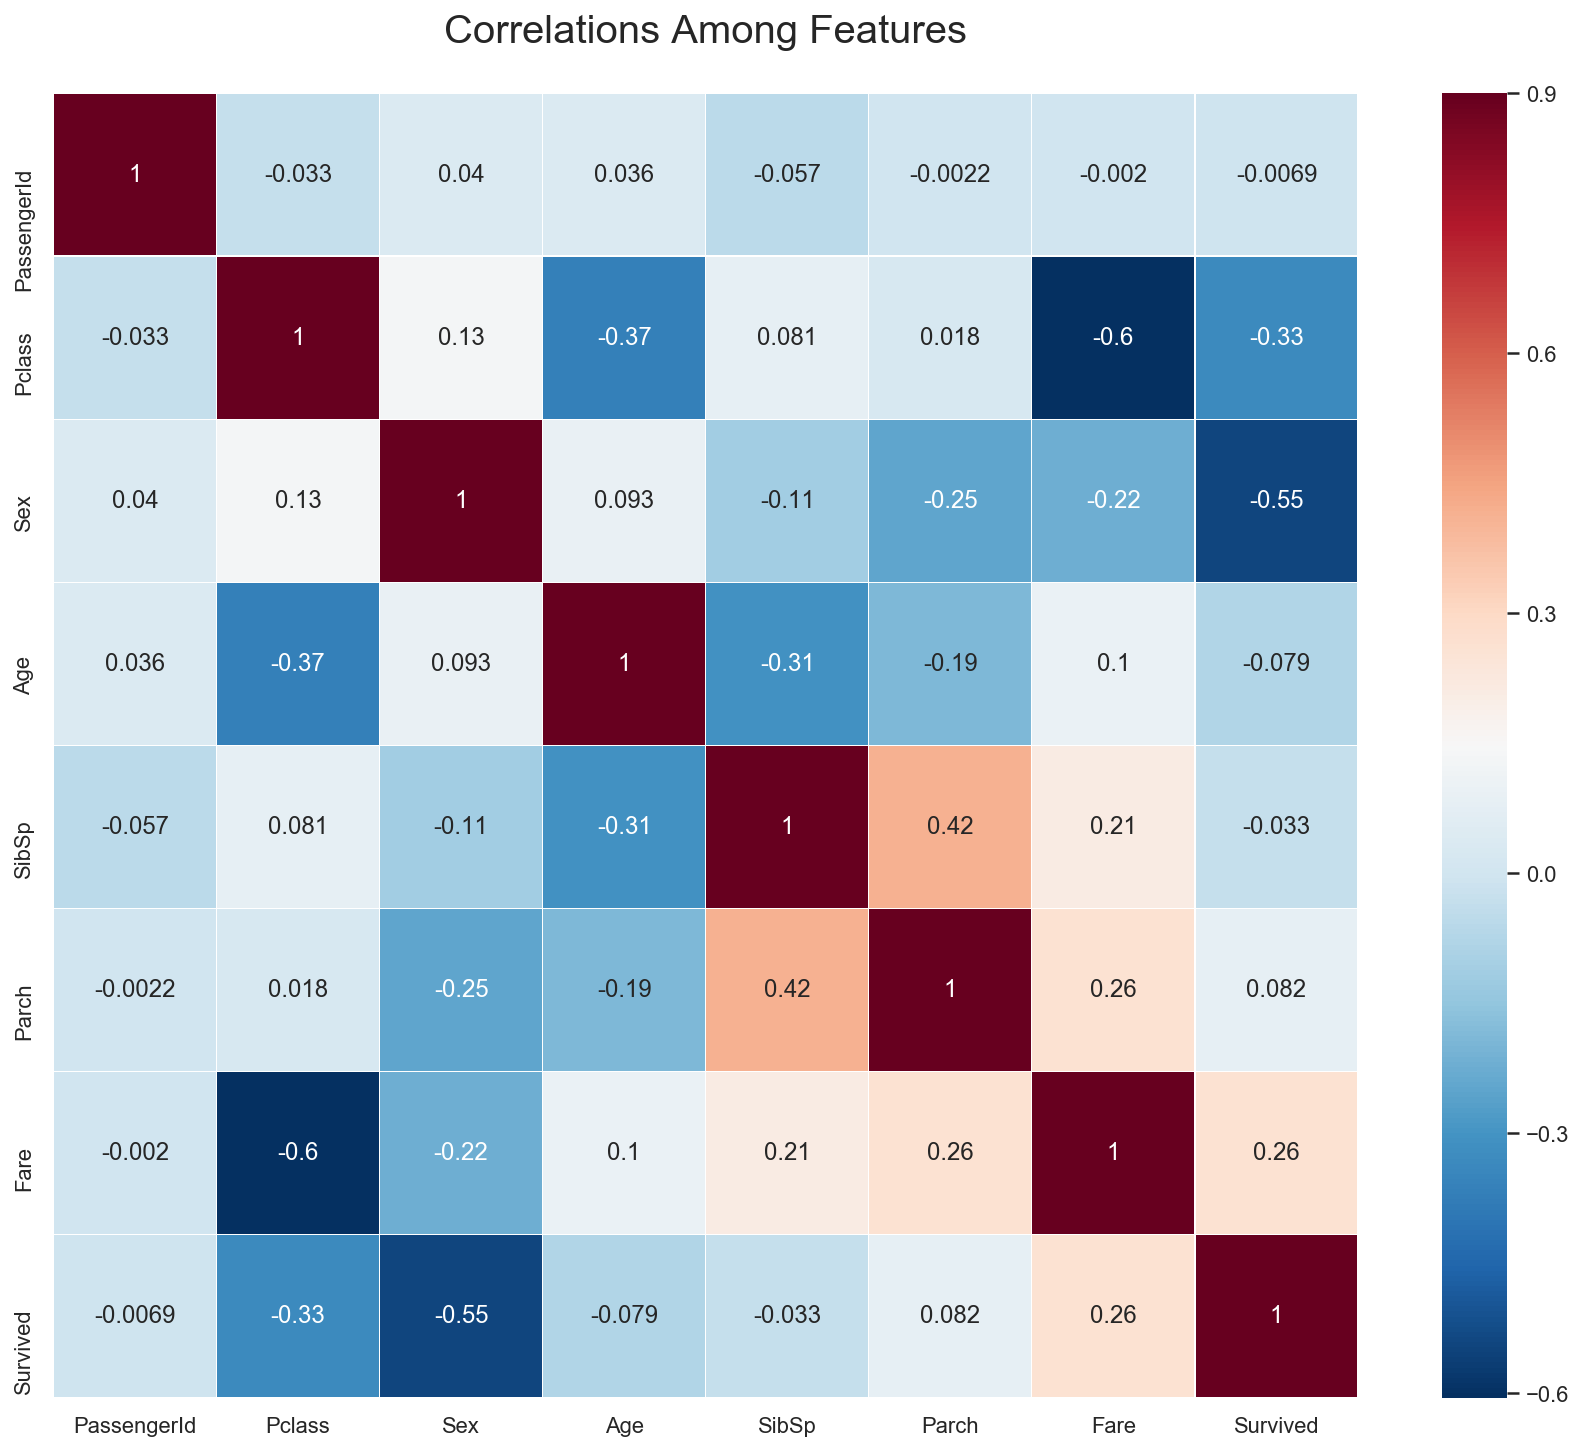

In [98]:
mask = np.zeros_like(train.corr(), dtype=np.bool)

plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax=.9,
           square=True)
plt.title('Correlations Among Features', y=1.03, fontsize=20)

In [ ]:
train['name_length'] = [len(i) for ]